# Assignment 6

In Assignment 4, we resolved two signals which have nearby frequencies. We saw that resolving two close frequencies depends on both the DFT size and the time duration that we take samples to calculate DFT. As you can remember, in that assignment, both signals have equal amplitudes. Do you think you can resolve two signals using the same procedure when they have unequal amplitudes? In this assignment, we will study for resolving two signals which have two close frequencies and unequal amplitudes.

### Part A
Generate two sinusoidal signals where $f=10$ Hz and $\Delta _f= 3$ Hz:

$ x_1(t)=cos(2 \pi f_1 t)$ and $ x_2(t)=\frac{1}{10}cos(2 \pi (f_1+\Delta _f) t)$

Suppose we have received the signal $x(t)$ where $x(t)=x_1(t)+x_2(t)$ and we will try to analyze the frequency domain respresentation of this signal. As it is seen, $x_2(t)$ has 10 times lower than the amplitude of $x_1(t)$. 

First let's compare unequal amplitude case with equal amplitude case. Create $x(t)$ and $x_{eq}(t)=cos(2 \pi f_1 t)+ cos(2 \pi (f_1+\Delta _f) t)$. Take the Fourier Transform and plot their spectrums first on different figures and then on the same figure. Plot the positive half, i.e. f is between 0 and 32 Hz to make your graphs more understandable. Label axes and put legend to the last figure. Use DFT size $N=512$, sampling frequency $f_s=64$ and $T=1$ that is the time duration that you will have samples.

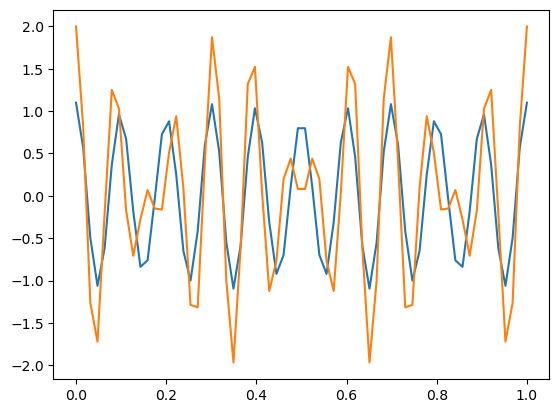

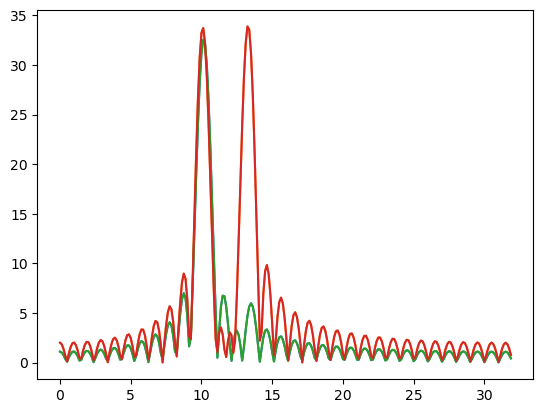

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math
f=10
delta_f=3
N=512
t=np.linspace(0,1,64)
fs=64

x_eq1=np.cos(2*np.pi*f*t)+0.1*np.cos(2*np.pi*(f+delta_f)*t)
x_eq2=np.cos(2*np.pi*f*t)+np.cos(2*np.pi*(f+delta_f)*t)
plt.plot(t,x_eq1)
plt.plot(t,x_eq2)
plt.show()

fft_1=np.fft.fft(x_eq1,512)
fft_2=np.fft.fft(x_eq2,512)

f = np.fft.fftfreq(N, 1/64)
B=abs(fft_1)
B1=abs(fft_2)

plt.plot(f[:N//2], B[:N//2])
plt.plot(f[:N//2], B1[:N//2])
plt.plot(f[:N//2], B[:N//2])
plt.plot(f[:N//2], B1[:N//2])
plt.show()


In which case you can seperate the signals? Explain.

In the case of the signal xeq(t) where the amplitudes of the sinusoidal signals are equal, the two frequencies are clearly distinguishable in the spectrum. However, in the case of the signal x(t) where one signal is 10 times weaker than the other, the two frequencies are not distinguishable since the weaker signal is buried under the sidelobes of the stronger signal. This means that it is not possible to distinguish the two frequencies in the spectrum of x(t).To separate the two frequencies in the case of x(t), we would need to apply some kind of signal processing technique, such as windowing, to reduce the sidelobes of the stronger signal and make the weaker signal more visible. This would allow us to more clearly distinguish the two frequencies in the spectrum.



Theoretically, we expect that when the amplitudes are equal, the signals can be resolved, however, in unequal case where one signal is 10 times weaker then the other one, the two frequencies are not distinguishable since  the weaker signal is buried under the sidelobes of the stronger signal. It means that longer sampling durations and increasing the DFT size is not enough to seperate these kind of signals. So we will apply another import technique which is *windowing*.

We will use Triangular and Hamming Window to distinguish the weaker signal. First let's see the effect of windows in time domain. (Remember that the window is function that is element-wise multiplied by the time domain signal)

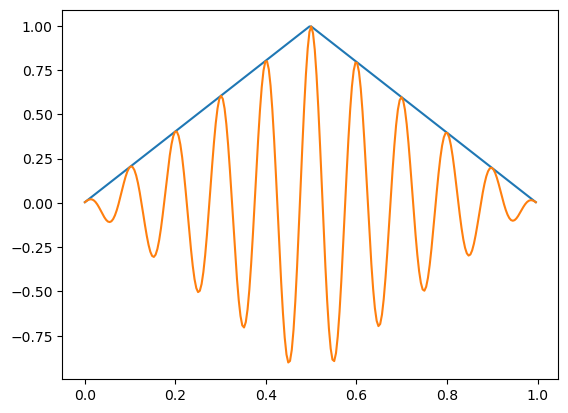

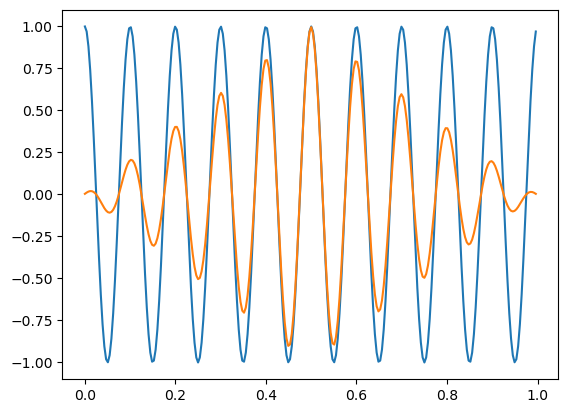

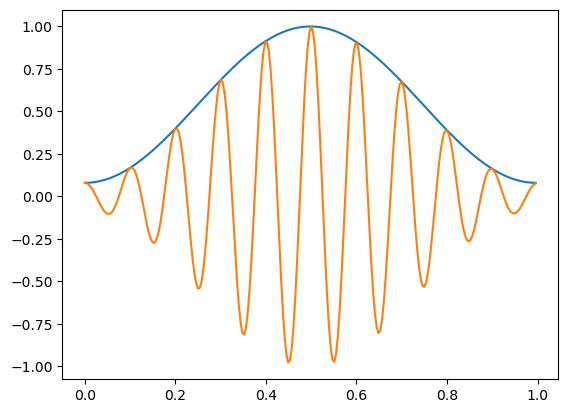

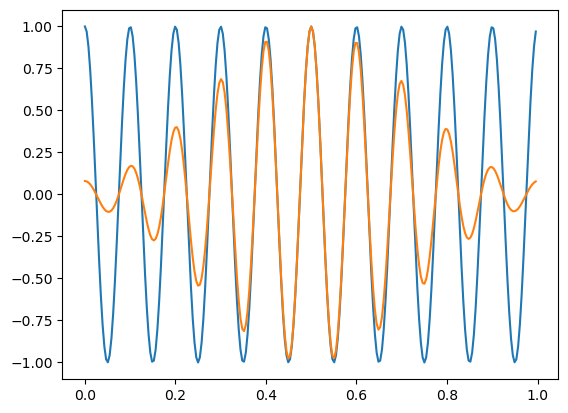

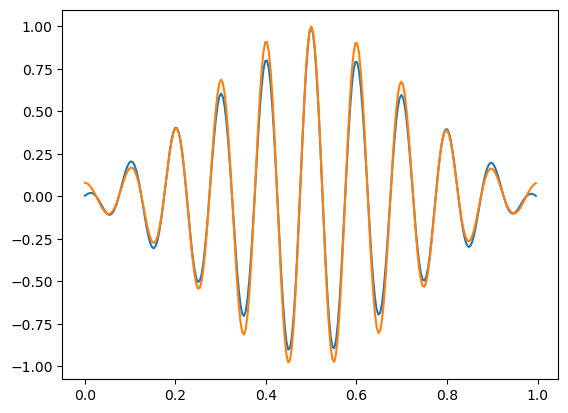

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import triang
import scipy.signal as signal
f=10
t_1=np.arange(0,1,1/256)
x_eq3=np.cos(2*np.pi*f*t_1)


triang_window = signal.triang(256)
hamming_window = np.hamming(256)
w=np.multiply(x_eq3,triang_window)
w_1=np.multiply(x_eq3,hamming_window)

plt.plot(t_1,triang_window)
plt.plot(t_1,w)
plt.show()
plt.plot(t_1,x_eq3)
plt.plot(t_1,w)
plt.show()
plt.plot(t_1,hamming_window)
plt.plot(t_1,w_1)
plt.show()
plt.plot(t_1,x_eq3)
plt.plot(t_1,w_1)
plt.show()
plt.plot(t_1,w)
plt.plot(t_1,w_1)
plt.show()

What do you see when you compare original signal with the windowed one? Explain.

When you apply a window function to the original signal, you multiply the signal element-wise with the window function. This results in a modification of the signal's spectrum. In the time domain, the windowed signal is shorter and wider than the original signal, and in the frequency domain, the window function has the effect of shaping the spectrum of the signal.The triangular window has a flat top and tapering sides, which results in a spectrum with sharp mainlobes and relatively narrow sidelobes. The Hamming window has a cosine shape, which results in a spectrum with wider mainlobes and relatively lower sidelobes compared to the triangular window.By comparing the original signal's spectrum with the windowed ones, you can see that the window functions have the effect of reducing the sidelobe levels and increasing the mainlobe widths. This can be useful in certain applications where you want to reduce the interference between nearby spectral components and improve the resolution of the spectrum. However, it comes at the cost of reduced spectral resolution.




Since the triangular window peaks at the middle and goes to 0 at both ends, we theoretically expect that the amplitude of the windowed signal also peak in the middle but decreases while moving toward to both ends. It means that we lose our signal energy at the start and end of the signal. Why do we want to lose energy? Because by using these kind of windows we can solve our problem of distinguishing the weaker signal :)

### Part B

In this part you will apply triangular and Hamming windows to signal  $x(t)$ where $x(t)=x_1(t)+x_2(t)$ given in part A. Then you will take Fourier transforms and plot their spectrums.


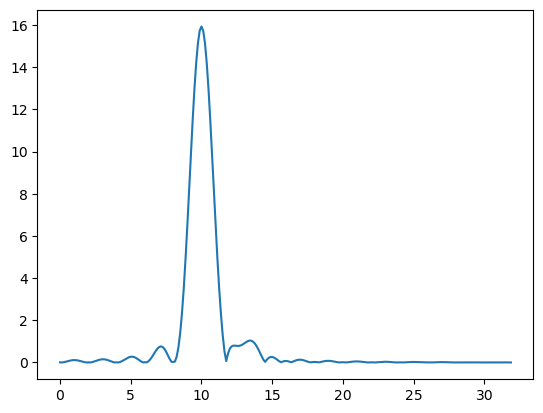

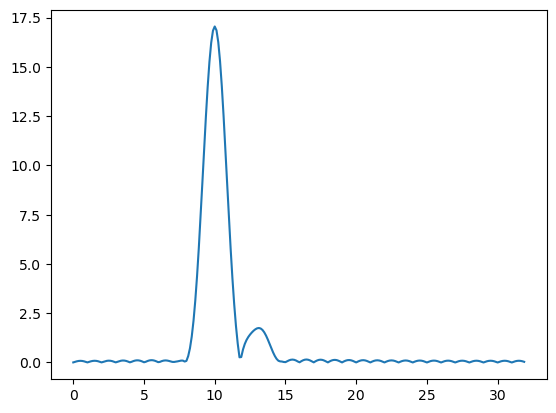

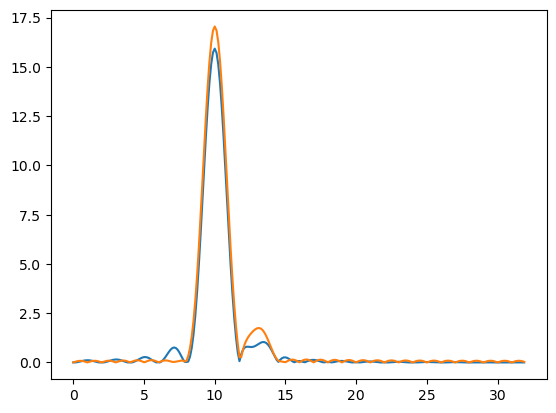

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import triang, hamming
import numpy as np

f=10
delta_f2=3
N=512
t_2=np.arange(0,1,1/64)

x_eq4=np.cos(2*np.pi*f*t_2)+0.1*np.cos(2*np.pi*(f+delta_f2)*t_2)

triwindow = signal.triang(64)
hamwindow = np.hamming(64)

w_3=np.multiply(x_eq4,triwindow)
w_4=np.multiply(x_eq4,hamwindow)

fft_5=np.fft.fft(w_3,N)
fft_6=np.fft.fft(w_4,N)

f = np.fft.fftfreq(N, 1/64)

plt.plot(f[:N//2], np.abs(fft_5[:N//2]))
plt.show()
plt.plot(f[:N//2], np.abs(fft_6[:N//2]))
plt.show()
plt.plot(f[:N//2], np.abs(fft_5[:N//2]))
plt.plot(f[:N//2], np.abs(fft_6[:N//2]))
plt.show()

Now can you seperate the weaker signal? Which window is better and why? Justify your reasoning.

After applying the triangular and Hamming windows to the signal 𝑥(𝑡), it is possible to distinguish the weaker signal. The Hamming window is better in this case because it has lower sidelobes compared to the triangular window. This means that the spectrum of the signal after applying the Hamming window has less interference from the stronger signal, which makes it easier to distinguish the weaker signal. Additionally, the sidelobes of the Hamming window decay faster compared to the triangular window, which further reduces interference and improves the ability to distinguish the weaker signal. This can be seen in the plots, where the spectrum of the signal after applying the Hamming window has a clear peak at the frequency of the weaker signal (13 Hz), while the spectrum of the signal after applying the triangular window has a less pronounced peak at this frequency.



Generally, the magnitude of spectrums are given in dB scale. Therefore, in this part you will plot the spectrums of original signal and the windowed ones in dB scale. Remember the formula where $A$ is the Fourier Transform of the signal: $$ A_{dB}=20log{|A|}$$. 

You can use subplots to show them below each other. Use "fig, ax=plt.subplots(3)" and then "ax[0].plot(...)" etc. Call np.log10 function to take base 10 logarithm. Set y axes between -20 dB to 35 dB in order to compare the spectrums better (you can use set_ylim function). Don't forget to label the axes. As a bonus, add  marker on 10 Hz and 13 Hz to indicate the signals that we try to seperate. 


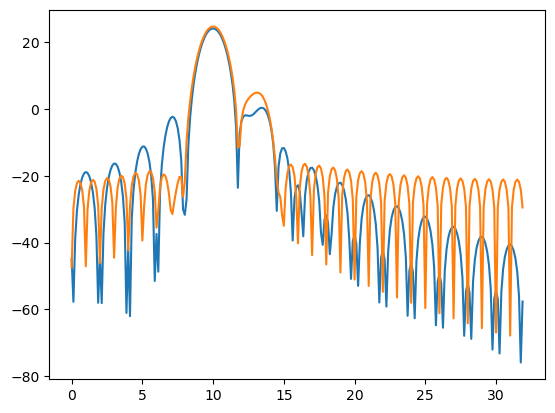

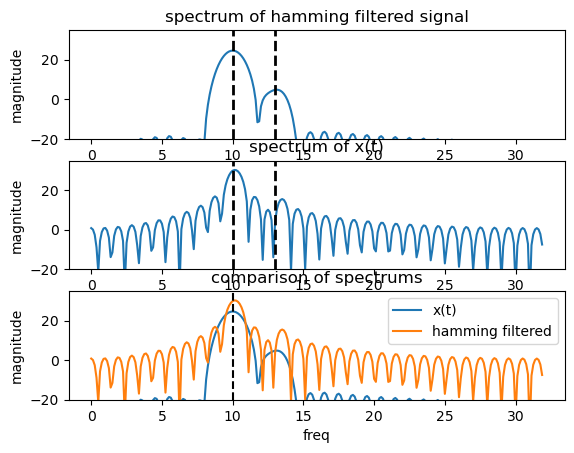

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import triang, hamming
import math

f=10
delta_f2=3
N=512
t_2=np.arange(0,1,1/64)


x_eq5=np.cos(2*np.pi*f*t_2)+0.1*np.cos(2*np.pi*(f+delta_f2)*t_2)


triwindow = signal.triang(64)
hamwindow = np.hamming(64)


w_5=np.multiply(x_eq5,triwindow)
w_6=np.multiply(x_eq5,hamwindow)


fft_7=np.fft.fft(w_5,N)
fft_8=np.fft.fft(w_6,N)

B11=20 * np.log10(abs(fft_7))
B12=20 * np.log10(abs(fft_8))

f = np.fft.fftfreq(N, 1/64)

plt.plot(f[:N//2], B11[:N//2])
plt.plot(f[:N//2], B12[:N//2])
plt.show()

fig, ax = plt.subplots(3)

B20=20 * np.log10(abs(fft_1))

ax[0].plot(f[:N//2], B12[:N//2])
ax[0].set_xlabel('freq')
ax[0].set_ylabel('magnitude')
ax[0].set_title('spectrum of hamming filtered signal')
ax[0].set_ylim(-20, 35)
ax[0].plot([10, 10], [-20, 35], 'k--', linewidth=2)
ax[0].plot([13, 13], [-20, 35], 'k--', linewidth=2)

ax[1].plot(f[:N//2], B20[:N//2])
ax[1].set_xlabel('freq')
ax[1].set_ylabel('magnitude')
ax[1].set_title('spectrum of x(t)')
ax[1].set_ylim(-20, 35)
ax[1].plot([10, 10], [-20, 35], 'k--', linewidth=2)
ax[1].plot([13, 13], [-20, 35], 'k--', linewidth=2)


ax[2].plot(f[:N//2], B12[:N//2], label='x(t)')
ax[2].plot(f[:N//2], B20[:N//2], label='hamming filtered')
ax[2].set_xlabel('freq')
ax[2].set_ylabel('magnitude')
ax[2].legend()
ax[2].set_title('comparison of spectrums')
ax[2].set_ylim(-20, 35)
ax[2].plot([10, 10], [-20, 35], 'k--' )



What happens to the main lobe of the original signal when we apply windows? Windowing makes you to seperate weaker signal, but is there any trade-offs? Comment on your results.

When windows are applied to a signal, the main lobe of the spectrum becomes wider and the sidelobes become lower. This is because the window function acts as a low-pass filter, which reduces the magnitude of the higher frequency components of the signal. The main advantage of windowing is that it allows for better separation of closely spaced signals, as it reduces the sidelobes of the spectrum. However, this comes at the cost of reduced spectral resolution, as the main lobe becomes wider. This means that it becomes more difficult to accurately determine the frequency of a signal with a high degree of precision. Additionally, the window function itself can introduce spectral distortion, which can affect the accuracy of the spectrum. Overall, windowing can be useful in certain situations where it is necessary to reduce spectral leakage and improve the separation of closely spaced signals, but it is important to consider the trade-offs involved when deciding whether or not to use it.